In [8]:
import numpy as np
# Based on the provided model and the given code, we will modify the code accordingly.

# Define the angle po (α') using the provided formula
po = lambda ap, bp: np.arctan(np.cos((bp - 90) * np.pi / 180) * np.tan(ap * np.pi / 180)) * 180 / np.pi

# Define the function W to calculate the coverage width
W = lambda D, x, po_value: (D - x * np.tan(po_value * np.pi / 180)) * (
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 - po_value - theta / 2) * np.pi / 180) + 
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 + po_value - theta / 2) * np.pi / 180)
) * np.cos(po_value * np.pi / 180)

# Define the function YT
YT = lambda d, po_value: d * (np.sin((90 + theta / 2) * np.pi / 180) / np.sin((90 - theta / 2 - po_value) * np.pi / 180)) * np.cos(po_value * np.pi / 180)

# Other calculations provided in the code
y = np.arange(0, 2.4, 0.3) * 1852
bpk = np.arange(90, 180)  # Angle beta
alpha = 1.5
D_center = 110
theta = 120
JA = np.arctan(1 / 2) * 180 / np.pi
x_max = np.sin((180 - bpk + JA) * np.pi / 180) * 5**0.5 * 1852
y_max = np.abs(np.cos((180 - bpk - JA) * np.pi / 180) * 5**0.5 * 1852)

x = [0]
while x[-1] < 2 * 1852:
    di = np.arange(0, 1000,0.3)
    x.append(x[-1] + di[np.argmin(np.abs((W(D_center, di + x[-1], alpha) - YT(di, alpha)) / W(D_center, di + x[-1], alpha) - 0.2))])

while x[0] > -2 * 1852:
    di = np.arange(0, -1000, -1)
    x = [x[0] + di[np.argmin(np.abs((W(D_center, di + x[0], alpha) - YT(-di, alpha)) / W(D_center, di + x[0], alpha) - 0.2))]] + x

x = np.round(x, 2)
x

array([-3827. , -3270. , -2751. , -2268. , -1819. , -1401. , -1012. ,
        -650. ,  -313. ,     0. ,   272.7,   527.7,   766.2,   989.1,
        1197.6,  1392.6,  1575. ,  1745.4,  1904.7,  2053.8,  2193.3,
        2323.5,  2445.3,  2559.3,  2665.8,  2765.4,  2858.7,  2945.7,
        3027.3,  3103.5,  3174.6,  3241.2,  3303.6,  3361.8,  3416.4,
        3467.4,  3515.1,  3559.5,  3601.2,  3640.2,  3676.5,  3710.4])

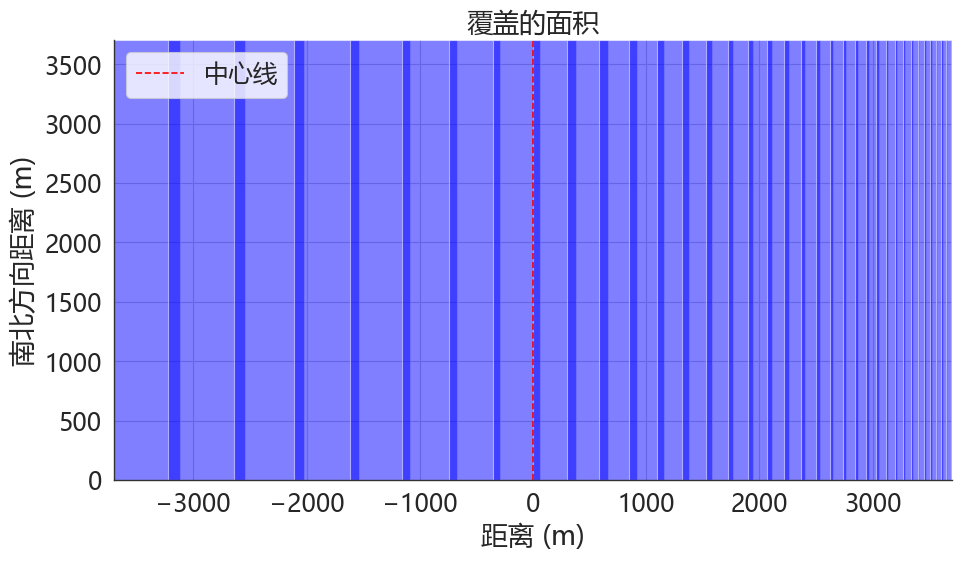

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# 设置seaborn的风格
sns.set_style("whitegrid", {"axes.edgecolor": ".2", "grid.color": ".8"})
sns.set_context("paper", font_scale=2)

# 绘制覆盖的面积
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-2*1852, 2*1852)
ax.set_ylim(0, 2*1852)
ax.set_title("覆盖的面积")
ax.set_xlabel("距离 (m)")
ax.set_ylabel("南北方向距离 (m)")

# 绘制中心线
ax.axvline(0, color='r', linestyle='--', label="中心线")

# 绘制测线覆盖的面积
for position in x:
    rect = patches.Rectangle((position, 0), W(D_center, position, po(alpha, 90)), 2*1852, facecolor='blue', alpha=0.5)
    ax.add_patch(rect)

# 删除顶部和右侧的轴线
sns.despine()
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
ax.legend()
plt.tight_layout()  # 调整布局以避免标签重叠
plt.show()


In [3]:
# Based on the provided model and the given code, we will modify the code accordingly.

# Define the angle po (α') using the provided formula
po = lambda ap, bp: np.arctan(np.cos((bp - 90) * np.pi / 180) * np.tan(ap * np.pi / 180)) * 180 / np.pi

# Define the function W to calculate the coverage width
W = lambda D, x, po_value: (D - x * np.tan(po_value * np.pi / 180)) * (
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 - po_value - theta / 2) * np.pi / 180) + 
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 + po_value - theta / 2) * np.pi / 180)
) * np.cos(po_value * np.pi / 180)

# Define the function YT
YT = lambda d, po_value: d * (np.sin((90 + theta / 2) * np.pi / 180) / np.sin((90 - theta / 2 - po_value) * np.pi / 180)) * np.cos(po_value * np.pi / 180)

# Other calculations provided in the code
y = np.arange(0, 2.4, 0.3) * 1852
bpk = np.arange(90, 180)  # Angle beta
alpha = 1.5
D_center = 110
theta = 120
JA = np.arctan(1 / 2) * 180 / np.pi
x_max = np.sin((180 - bpk + JA) * np.pi / 180) * 5**0.5 * 1852
y_max = np.abs(np.cos((180 - bpk - JA) * np.pi / 180) * 5**0.5 * 1852)

x = [0]
while x[-1] < 2 * 1852:
    di = np.arange(0, 1000,0.3)
    x.append(x[-1] + di[np.argmin(np.abs((W(D_center, di + x[-1], alpha) - YT(di, alpha)) / W(D_center, di + x[-1], alpha) - 0.1))])

while x[0] > -2 * 1852:
    di = np.arange(0, -1000, -1)
    x = [x[0] + di[np.argmin(np.abs((W(D_center, di + x[0], alpha) - YT(-di, alpha)) / W(D_center, di + x[0], alpha) - 0.1))]] + x

x = np.round(x, 2)
x

array([-3851. , -3222. , -2642. , -2108. , -1615. , -1161. ,  -742. ,
        -356. ,     0. ,   304.2,   586.5,   848.4,  1091.1,  1316.4,
        1525.2,  1719. ,  1898.7,  2065.5,  2220.3,  2363.7,  2496.9,
        2620.2,  2734.8,  2841. ,  2939.4,  3030.9,  3115.5,  3194.1,
        3267. ,  3334.5,  3397.2,  3455.4,  3509.4,  3559.5,  3606. ,
        3649.2,  3689.1,  3726.3])